In [2]:
import numpy as np
import pandas as pd 


In [3]:
import warnings


In [4]:
warnings.filterwarnings("ignore")

## My DATA is divided into 2 files

In [5]:
df=pd.read_csv("u.data",sep="\t")


In [6]:
df.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [7]:
df.columns=["user id","item id","rating","time stamp"]

In [8]:
df.head

<bound method NDFrame.head of        user id  item id  rating  time stamp
0          186      302       3   891717742
1           22      377       1   878887116
2          244       51       2   880606923
3          166      346       1   886397596
4          298      474       4   884182806
...        ...      ...     ...         ...
99994      880      476       3   880175444
99995      716      204       5   879795543
99996      276     1090       1   874795795
99997       13      225       2   882399156
99998       12      203       3   879959583

[99999 rows x 4 columns]>

In [9]:
df.head()

,user id,item id,rating,time stamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [10]:
dfa=pd.read_csv("u.item",sep="|",header=None,encoding="latin-1")

In [11]:
dfa.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
dfa=dfa[[0,1]]

In [13]:
dfa.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
dfa.columns=["item id","movie name"]

In [15]:
df=pd.merge(df,dfa, on = "item id")

In [16]:
df.head()

,user id,item id,rating,time stamp,movie name
0,186,302,3,891717742,L.A. Confidential (1997)
1,191,302,4,891560253,L.A. Confidential (1997)
2,49,302,4,888065432,L.A. Confidential (1997)
3,54,302,4,880928519,L.A. Confidential (1997)
4,62,302,3,879371909,L.A. Confidential (1997)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.groupby('movie name').mean()['rating'] #average rating of the movies

movie name
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [19]:
df.groupby('movie name').count()["rating"] #number of ratings for a movie

movie name
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [20]:
ratings=pd.DataFrame(df.groupby('movie name').mean()['rating'])

In [21]:
ratings.head() #creating a dataframe of ratings


,rating
movie name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [22]:
ratings['n_rating']=pd.DataFrame(df.groupby('movie name').count()["rating"]) #adding a column of number of ratings

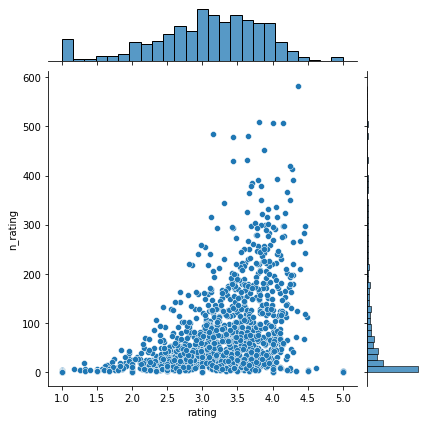

In [23]:
sns.jointplot("rating","n_rating",data=ratings) # plot depicts more reviews higher ratings

In [24]:
df.head()


,user id,item id,rating,time stamp,movie name
0,186,302,3,891717742,L.A. Confidential (1997)
1,191,302,4,891560253,L.A. Confidential (1997)
2,49,302,4,888065432,L.A. Confidential (1997)
3,54,302,4,880928519,L.A. Confidential (1997)
4,62,302,3,879371909,L.A. Confidential (1997)


In [25]:
user_movie_rating=df.pivot_table(values="rating",index='user id',columns="movie name") #corresponding data frame   with columns as movie etc
user_movie_rating.head()


movie name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [26]:
ratings.head()

,rating,n_rating
movie name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [27]:
ratings.sort_values("n_rating",ascending=False)

,rating,n_rating
movie name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [28]:
contact_movie_ratings=user_movie_rating["Contact (1997)"]

In [29]:
contact_movie_ratings.head(10)


user id
1     5.0
2     3.0
3     2.0
4     5.0
5     NaN
6     2.0
7     4.0
8     5.0
9     NaN
10    NaN
Name: Contact (1997), dtype: float64

In [30]:
#contact_movie_ratings.dropna(inplace=True)


In [31]:
#contact_movie_ratings.columns=["user id","rating"]

In [32]:
similar_contact=user_movie_rating.corrwith(contact_movie_ratings)  # correlation matrix with contact 1970 movie ratings by per user and other movies in same indexes

In [33]:
similar_contact.head()

movie name
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [34]:
similar_contact.shape

(1664,)

In [35]:
similar_contact.dropna(inplace=True)

In [36]:
similar_contact.columns=["correlation"]

In [37]:
similar_contact.dtype

dtype('float64')

In [38]:
type(similar_contact)

pandas.core.series.Series

In [39]:
contact_simliar=pd.DataFrame(similar_contact,columns=["Correlation"])

In [40]:
contact_simliar.head()

,Correlation
movie name,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


In [41]:
contact_simliar.sort_values("Correlation",ascending=False)

,Correlation
movie name,
Lamerica (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
Contact (1997),1.0
...,...
Dingo (1992),-1.0
Romper Stomper (1992),-1.0
Hearts and Minds (1996),-1.0


In [42]:
contact_simliar=contact_simliar.join(ratings["n_rating"])

In [43]:
contact_simliar.head()

,Correlation,n_rating
movie name,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [44]:
contact_simliar=contact_simliar[contact_simliar["n_rating"]>100].sort_values("Correlation",ascending=False)

In [45]:
contact_simliar.head(10)

,Correlation,n_rating
movie name,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
Sneakers (1992),0.377275,150
"Firm, The (1993)",0.376987,151
Arsenic and Old Lace (1944),0.373759,115
Outbreak (1995),0.358015,104


In [46]:
def recommended_movies(movie):
    movie_ratings=user_movie_rating[movie]
    similar=user_movie_rating.corrwith(movie_ratings)
    similar.dropna(inplace=True)
    similar.columns=["correlation"]
    contact=pd.DataFrame(similar,columns=["Correlation"])
    contact=contact.join(ratings["n_rating"])
    contact=contact[contact["n_rating"]>100].sort_values("Correlation",ascending=False)
    return contact

In [47]:
a=recommended_movies("Star Wars (1977)")

In [48]:
a.head(9)

,Correlation,n_rating
movie name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
